<a href="https://colab.research.google.com/github/amnasyed1/datasci_6_regression/blob/main/datasci_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [18]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
# for multiple reggression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

# **Simple Linear Regression Model**

- Independent Variable: age
  - age of individual
- Dependent Variable: chol
  - serum cholesterol levels



In [3]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
df = heart_disease.data.features
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [4]:
# metadata
print(heart_disease.metadata)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [7]:
df.to_csv('heart_disease.csv')

In [9]:
# Fit the regression model
X = sm.add_constant(df['age'])  # Adds a constant term to the predictor
model = sm.OLS(df['chol'], X)

results = model.fit()
# Print summary of the regression
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     13.74
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           0.000250
Time:                        21:04:23   Log-Likelihood:                -1618.6
No. Observations:                 303   AIC:                             3241.
Df Residuals:                     301   BIC:                             3249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.5325     17.818     10.188      0.0

In [10]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

# comes from the statsmodel.stats.diagnostic

Rainbow Test: stat=0.9978384234038479, p-value=0.5055023698774269


In [11]:
residuals = results.resid
fitted = results.fittedvalues

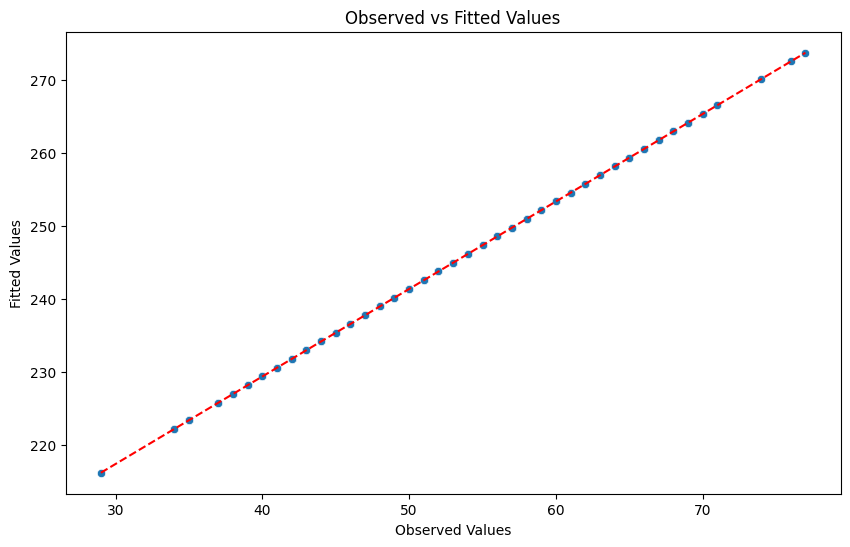

In [13]:
## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['age'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['age']), max(df['age'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

In [14]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9537262916564941, p-value=3.43000152724926e-08


Shapiro-Wilk Test: W=0.9537262916564941, p-value=3.43000152724926e-08


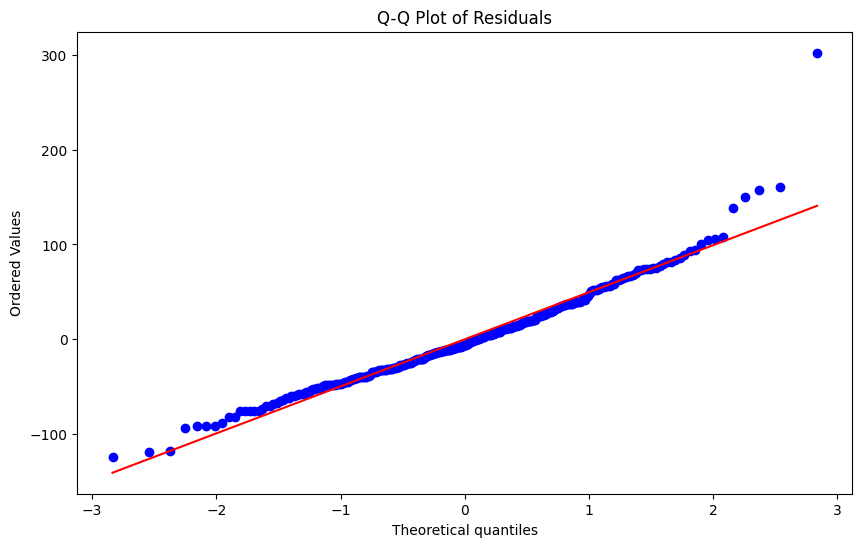

In [15]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [16]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.3799832930144131, p-value=0.024881131340494998


## **Model Evaluation**

- The R-squared value for the regression model is 0.044.
- The closer the R-squared value is to 1, the better the fit, the closer to 0, the less the model is a fit. Therefore, the independent variable ,age, are not a strong predictor of the dependent variable, chol. The R-square value indicates a weak fit at 4.4%.

## **Checking the Assumptions**

- The Rainbow Test indicated a p-value of 0.5055, which is greater than the significance level of 0.05. This indicates there is a linear relationship between the Independent Variable, Age, and Dependent Variable, Chol.

- The Shapiro-Wilk Test showed a p-value of 3.43000152724926e-08, which is less than the significance level of 0.05. This indicates that the residuals are not normally distributed.

- The Goldfeld-Quandt Test showed a p-value of 0.0248, which is less than the signidicance level of 0.05, indicating there is not strong evidence for homogeneity.

- The visualization also indicates a clear direct linear relationship between age and chol levels

## **Reasoning behind the dataset and variable choices**

- I chose this dataset as it contained two numerical values,an independent variable and a dependent variable (to be predicted).
- I chose "age" as the independent variable and "chol" as the dependent variable because I was curious to see if the age of an individual and serum cholestoral levels had any type of relationship.

# **Multiple Linear Regression**

- Independent Variable:
  - fixed_acidity
  - citric_acid
  - residual_sugar
  - sulphates
  - pH
- Dependent Variable:  
  - Density


In [81]:
# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
wine = wine_quality.data.features
wine



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [82]:
# metadata
print(wine_quality.metadata)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [86]:
import statsmodels.api as sm

# Assuming df is your DataFrame containing the dataset
X = wine[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'sulphates']]
y = wine['density']

X = sm.add_constant(X)  # Add a constant term to the independent variables

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                density   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2734.
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:41:03   Log-Likelihood:                 25920.
No. Observations:                4898   AIC:                        -5.182e+04
Df Residuals:                    4888   BIC:                        -5.176e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9721 

In [69]:
df.to_csv('wine_analysis.csv')

In [87]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

# comes from the statsmodel.stats.diagnostic

Rainbow Test: stat=0.8710289730502663, p-value=0.9996770828407407


In [88]:
residuals = results.resid
fitted = results.fittedvalues

Shapiro-Wilk Test: W=0.9793118238449097, p-value=3.899466103660604e-26


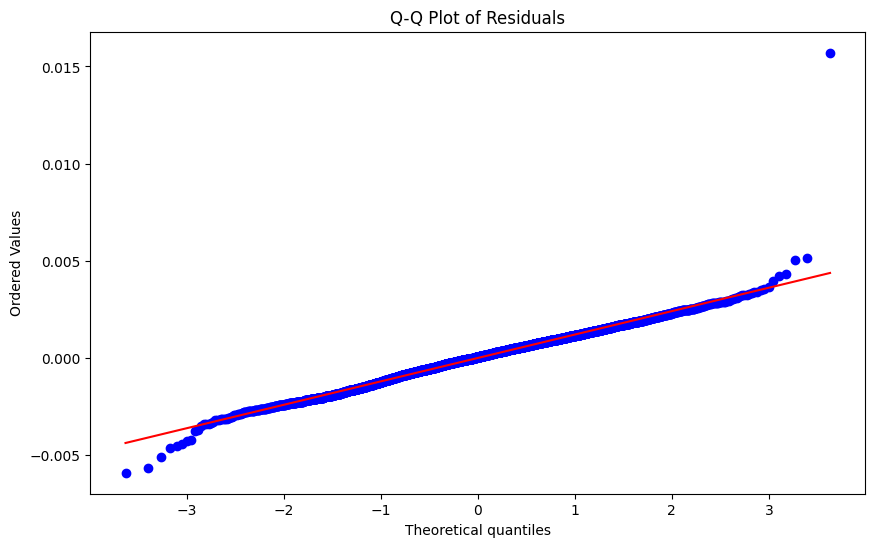

In [91]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [92]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.2074478232161878, p-value=1.6519955088508935e-06


In [93]:
# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
               Variable         VIF
0                 const  882.039549
1         fixed_acidity    1.351096
2      volatile_acidity    1.087992
3           citric_acid    1.153533
4        residual_sugar    1.263164
5             chlorides    1.066052
6   free_sulfur_dioxide    1.732148
7  total_sulfur_dioxide    1.969571
8                    pH    1.330075
9             sulphates    1.056225


## **Model Evaluation**

- The R-squared value for the regression model is 0.834.
- The closer the R-squared value is to 1, the better the fit, therefore, the independent variables are a strong predictor of the dependent variable, density. The R-square value indicates a strong fit at 83.4%

## **Checking the Assumptions**

- The Rainbow Test indicated a p-value of 0.9996, which is greater than the significance level of 0.05. This indicates there is a linear relationship between the Independent Variables and Dependent Variable.

- The Shapiro-Wilk Test showed a p-value of 3.899466103660604e-26, which is less than the significance level of 0.05. This indicates that the residuals are not normally distributed.

- The Goldfeld-Quandt Test showed a p-value of 1.6519955088508935e-06, which is less than the significance level of 0.05, indicating there is not strong evidence for homogeneity.

- The visualization also indicates a linear relationship.

## **Reasoning behind the dataset and variable choices**

- I chose this dataset as it at least five continuous variables.
- I chose the variables as they are traits that are in wine, and wondered if they contribute to the density (DV) of the wine.

## **Challenges**
- I tried working with two other datasets about liver disorders and liver patients, which contained 5 or more continuous variables. I was not able to utilize those datasets as they were not importing in their entirety into the notebook.